0.Описать задачу словами

Задача машинного обучения, с которой мы имеем дело, — это анализ данных о фильмах индийского производства с целью проведения предиктивного анализа. Наша конечная задача - предсказание кинематографического успеха, оцениваемого по рейтингу.
Это фильмы из списка самых высокооцениеваемых фильмов в истории, по версии пользователей IMDb.
Предсказываемое значение (целевая переменная): Это численный рейтинг (задача регрессии).

In [455]:
import numpy as np # Одномерные и многомерные массивы (array)
import pandas as pd # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns
import sklearn                  # Алгоритмы машинного обучения
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



from math import sqrt

url = "https://raw.githubusercontent.com/YourKladman/ml_home/main/imdbTop250.csv"
data_raw = pd.read_csv(url)

1. Прочитать данные

In [456]:
data_raw

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,Cast3,Cast4
0,1,1996,/title/tt0076759/,Star Wars: Episode IV - A New Hope,1977,121,"Action, Adventure, Fantasy",8.6,90.0,1299781,322.74,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness
1,2,1996,/title/tt0111161/,The Shawshank Redemption,1994,142,Drama,9.3,80.0,2529673,28.34,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
2,3,1996,/title/tt0117951/,Trainspotting,1996,93,Drama,8.1,83.0,665213,16.50,Danny Boyle,Ewan McGregor,Ewen Bremner,Jonny Lee Miller,Kevin McKidd
3,4,1996,/title/tt0114814/,The Usual Suspects,1995,106,"Crime, Drama, Mystery",8.5,77.0,1045626,23.34,Bryan Singer,Kevin Spacey,Gabriel Byrne,Chazz Palminteri,Stephen Baldwin
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,NaN,53316,NaN,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,246,2021,/title/tt0058946/,The Battle of Algiers,1966,121,"Drama, War",8.1,96.0,57995,0.06,Gillo Pontecorvo,Brahim Hadjadj,Jean Martin,Yacef Saadi,Samia Kerbash
6496,247,2021,/title/tt0050783/,Nights of Cabiria,1957,110,Drama,8.1,NaN,47318,0.75,Federico Fellini,Giulietta Masina,François Périer,Franca Marzi,Dorian Gray
6497,248,2021,/title/tt0093779/,The Princess Bride,1987,98,"Adventure, Family, Fantasy",8.1,77.0,416207,30.86,Rob Reiner,Cary Elwes,Mandy Patinkin,Robin Wright,Chris Sarandon
6498,249,2021,/title/tt7060344/,Raatchasan,2018,170,"Crime, Drama, Mystery",8.4,NaN,37474,NaN,Ram Kumar,Vishnu Vishal,Amala Paul,Radha Ravi,Sangili Murugan


In [457]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ranking   6500 non-null   int64  
 1   IMDByear  6500 non-null   int64  
 2   IMDBlink  6500 non-null   object 
 3   Title     6500 non-null   object 
 4   Date      6500 non-null   int64  
 5   RunTime   6500 non-null   int64  
 6   Genre     6500 non-null   object 
 7   Rating    6500 non-null   float64
 8   Score     5674 non-null   float64
 9   Votes     6500 non-null   int64  
 10  Gross     5691 non-null   float64
 11  Director  6500 non-null   object 
 12  Cast1     6500 non-null   object 
 13  Cast2     6500 non-null   object 
 14  Cast3     6492 non-null   object 
 15  Cast4     6492 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 812.6+ KB


Данный датасет включает такие атрибуты, как название фильма, год выпуска, ссылку на страницу фильма, продолжительность, жанр, рейтинг, количество голосов и информацию о режиссере и актерах.

Объем данных (N): Количество записей (фильмов) в датасете - 6500.
Количество признаков (d): Кол-во переменных, которые используются для предсказания (не включая целевую переменную) -11.
Содержит пропущенные значения

2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.
3. Обработать пропущенные значения (или убедиться, что их нет)

Cначала избавимся от пропущенных значений.

In [458]:
missing_values_per_column = data_raw.isna().sum()
print(missing_values_per_column)

Ranking       0
IMDByear      0
IMDBlink      0
Title         0
Date          0
RunTime       0
Genre         0
Rating        0
Score       826
Votes         0
Gross       809
Director      0
Cast1         0
Cast2         0
Cast3         8
Cast4         8
dtype: int64


In [459]:
data_raw = data_raw.dropna()

После этих изменений наш датасет содержит 5125 записей и 0 пропущенных значений

In [460]:
missing_values_per_column = data_raw.isna().sum()
print(missing_values_per_column)

Ranking     0
IMDByear    0
IMDBlink    0
Title       0
Date        0
RunTime     0
Genre       0
Rating      0
Score       0
Votes       0
Gross       0
Director    0
Cast1       0
Cast2       0
Cast3       0
Cast4       0
dtype: int64


In [461]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5125 entries, 0 to 6497
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ranking   5125 non-null   int64  
 1   IMDByear  5125 non-null   int64  
 2   IMDBlink  5125 non-null   object 
 3   Title     5125 non-null   object 
 4   Date      5125 non-null   int64  
 5   RunTime   5125 non-null   int64  
 6   Genre     5125 non-null   object 
 7   Rating    5125 non-null   float64
 8   Score     5125 non-null   float64
 9   Votes     5125 non-null   int64  
 10  Gross     5125 non-null   float64
 11  Director  5125 non-null   object 
 12  Cast1     5125 non-null   object 
 13  Cast2     5125 non-null   object 
 14  Cast3     5125 non-null   object 
 15  Cast4     5125 non-null   object 
dtypes: float64(3), int64(5), object(8)
memory usage: 680.7+ KB


In [462]:
data_raw.describe()

,Ranking,IMDByear,Date,RunTime,Rating,Score,Votes,Gross
count,5125.000000,5125.000000,5125.000000,5125.000000,5125.000000,5125.00000,5.125000e+03,5125.000000
mean,118.053268,2008.527024,1982.700878,128.904195,8.192234,83.89678,5.689183e+05,75.305852
std,72.280857,7.487193,21.693452,30.633648,0.334478,10.29461,4.910141e+05,104.944349
min,1.000000,1996.000000,1925.000000,66.000000,6.100000,61.00000,9.973000e+03,0.010000
25%,55.000000,2002.000000,1967.000000,107.000000,8.000000,77.00000,1.697020e+05,6.210000
50%,115.000000,2009.000000,1988.000000,124.000000,8.200000,85.00000,3.981760e+05,32.000000
75%,180.000000,2015.000000,1999.000000,142.000000,8.400000,92.00000,8.299410e+05,101.160000
max,250.000000,2021.000000,2019.000000,238.000000,9.300000,100.00000,2.529673e+06,936.660000


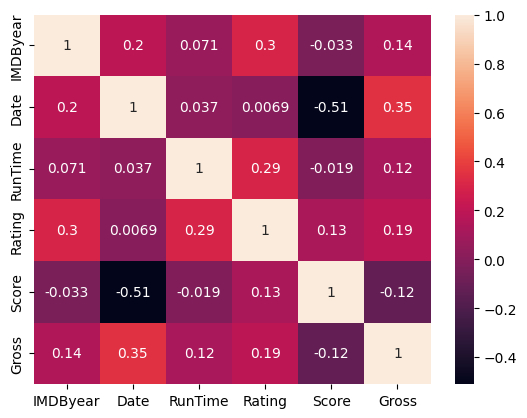

In [463]:
corr_matrix = data_raw[['IMDByear', 'Date', 'RunTime', 'Rating','Score','Gross']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

Признаки "Date" и "Score" имеют среднюю отрицательную линейную связь. "Score" и "Gross" имеют слабую отрицательную линейную связь. Остальные признаки имеют между собой также слабые линейные связи

Визуализируем данные

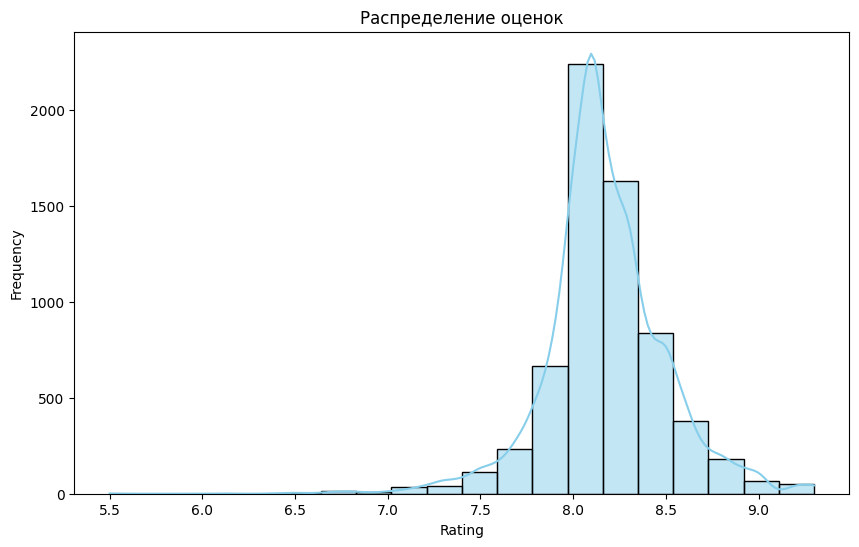

In [464]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], kde=True, bins=20, color='skyblue')
plt.title('Распределение оценок')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Наиболее распространнёные оценки находятся в диапазоне от 8 до 8.5 баллов.

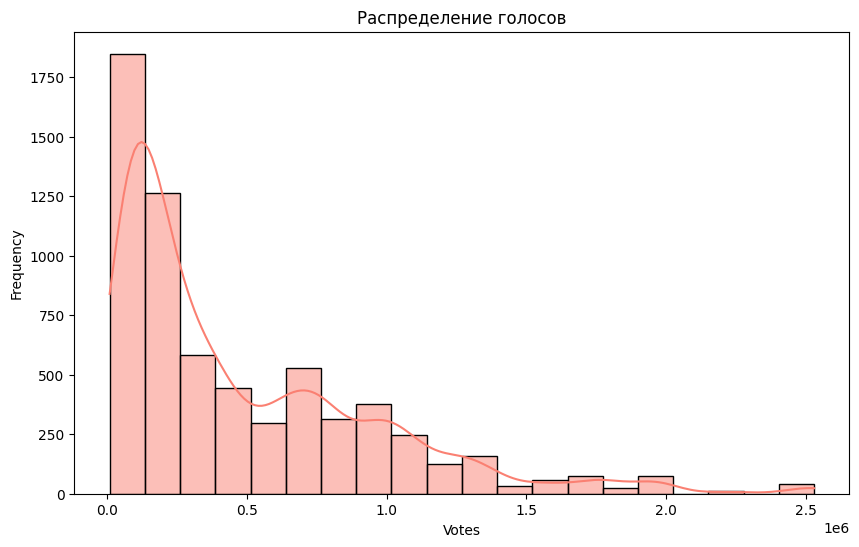

In [465]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Votes'], kde=True, bins=20, color='salmon')
plt.title('Распределение голосов')
plt.xlabel('Votes')
plt.ylabel('Frequency')

plt.show()

Наибольшее количество голосов находится в диапозоне от 0 до 20000.

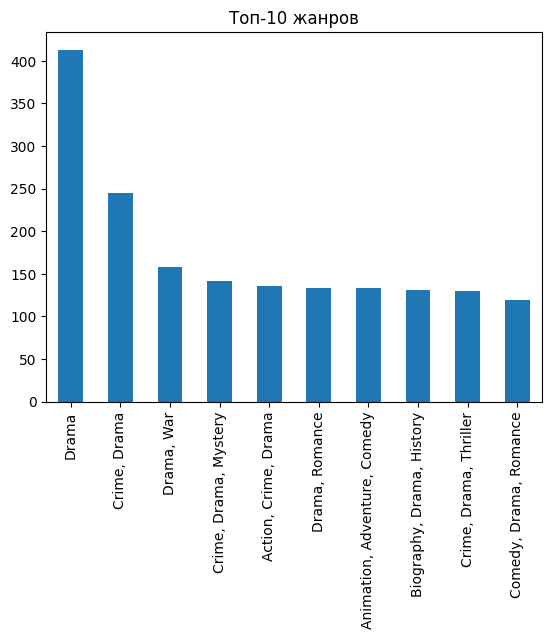

In [466]:
data_raw['Genre'].value_counts().head(10).plot(kind='bar', title='Топ-10 жанров')
plt.show()


Самый популярный жанр - Драма.

4. Обработать категориальные признаки

Обрабатывать как категориальные будем признаки "Жанр", "Режиссёр", "Актёр 1", "Актёр 2", "Актёр 3", "Актер 4"

In [467]:
data_raw['Genre'] = data_raw['Genre'].astype('category')
data_raw['Director'] = data_raw['Director'].astype('category')
data_raw['Cast1'] = data_raw['Cast1'].astype('category')
data_raw['Cast2'] = data_raw['Cast2'].astype('category')
data_raw['Cast3'] = data_raw['Cast3'].astype('category')
data_raw['Cast4'] = data_raw['Cast4'].astype('category')


<ipython-input-467-d2232451b272>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['Genre'] = data_raw['Genre'].astype('category')
<ipython-input-467-d2232451b272>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw['Director'] = data_raw['Director'].astype('category')
<ipython-input-467-d2232451b272>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [468]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5125 entries, 0 to 6497
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Ranking   5125 non-null   int64   
 1   IMDByear  5125 non-null   int64   
 2   IMDBlink  5125 non-null   object  
 3   Title     5125 non-null   object  
 4   Date      5125 non-null   int64   
 5   RunTime   5125 non-null   int64   
 6   Genre     5125 non-null   category
 7   Rating    5125 non-null   float64 
 8   Score     5125 non-null   float64 
 9   Votes     5125 non-null   int64   
 10  Gross     5125 non-null   float64 
 11  Director  5125 non-null   category
 12  Cast1     5125 non-null   category
 13  Cast2     5125 non-null   category
 14  Cast3     5125 non-null   category
 15  Cast4     5125 non-null   category
dtypes: category(6), float64(3), int64(5), object(2)
memory usage: 587.4+ KB


Применим кодирование частотой для категориальных признаков

In [469]:
# Функция для подсчета частот и замены на значения частоты
def frequency_encoding(column):
    # Подсчёт частоты появления каждой категории в столбце
    frequency_map = data_raw[column].value_counts().to_dict()
    # Замена категории на её частоту
    data_raw[column] = data_raw[column].map(frequency_map)

In [470]:
frequency_encoding('Cast1')
frequency_encoding('Cast2')
frequency_encoding('Cast3')
frequency_encoding('Cast4')
frequency_encoding('Director')
frequency_encoding('Genre')

<ipython-input-469-82e52c6fafc1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw[column] = data_raw[column].map(frequency_map)
<ipython-input-469-82e52c6fafc1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw[column] = data_raw[column].map(frequency_map)
<ipython-input-469-82e52c6fafc1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [471]:
data_raw[['Cast1','Cast2', 'Cast3','Cast4', 'Director','Genre']]

,Cast1,Cast2,Cast3,Cast4,Director,Genre
0,52,52,54,26,28,69
1,32,26,26,26,49,413
2,26,26,26,26,28,413
3,75,26,26,26,28,141
6,3,1,1,1,1,105
...,...,...,...,...,...,...
6490,50,24,24,24,49,70
6491,21,22,9,9,22,133
6492,11,11,11,11,11,413
6495,12,12,12,12,12,158


In [472]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5125 entries, 0 to 6497
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ranking   5125 non-null   int64  
 1   IMDByear  5125 non-null   int64  
 2   IMDBlink  5125 non-null   object 
 3   Title     5125 non-null   object 
 4   Date      5125 non-null   int64  
 5   RunTime   5125 non-null   int64  
 6   Genre     5125 non-null   int64  
 7   Rating    5125 non-null   float64
 8   Score     5125 non-null   float64
 9   Votes     5125 non-null   int64  
 10  Gross     5125 non-null   float64
 11  Director  5125 non-null   int64  
 12  Cast1     5125 non-null   int64  
 13  Cast2     5125 non-null   int64  
 14  Cast3     5125 non-null   int64  
 15  Cast4     5125 non-null   int64  
dtypes: float64(3), int64(11), object(2)
memory usage: 680.7+ KB


Теперь data_raw содержит закодированные частотами значения для актёров, жанра и режиссёра

5. Провести нормализацию

Проведём Min-Max нормализацию

In [473]:
#Инициализируем нормализатор
scaler = MinMaxScaler()

In [474]:
# Выбираем числовые признаки для нормализации(все, кроме целевой переменной)
features_to_normalize = [ 'Date', 'RunTime','Votes','Cast1','Cast2', 'Cast3','Cast4', 'Director','Genre', 'Gross']

# Подгоняем и преобразуем данные
data_raw[features_to_normalize] = scaler.fit_transform(data_raw[features_to_normalize])

<ipython-input-474-465c4de02124>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_raw[features_to_normalize] = scaler.fit_transform(data_raw[features_to_normalize])


In [475]:
data_raw

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,Cast3,Cast4
0,1,1996,/title/tt0076759/,Star Wars: Episode IV - A New Hope,0.553191,0.319767,0.165049,8.6,90.0,0.511890,0.344558,0.141361,0.342282,0.809524,0.779412,0.490196
1,2,1996,/title/tt0111161/,The Shawshank Redemption,0.734043,0.441860,1.000000,9.3,80.0,1.000000,0.030246,0.251309,0.208054,0.396825,0.367647,0.490196
2,3,1996,/title/tt0117951/,Trainspotting,0.755319,0.156977,1.000000,8.1,83.0,0.260047,0.017605,0.141361,0.167785,0.396825,0.367647,0.490196
3,4,1996,/title/tt0114814/,The Usual Suspects,0.744681,0.232558,0.339806,8.5,77.0,0.411022,0.024908,0.141361,0.496644,0.396825,0.367647,0.490196
6,7,1996,/title/tt0117731/,Star Trek: First Contact,0.755319,0.261628,0.252427,7.6,71.0,0.044785,0.098212,0.000000,0.013423,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,241,2021,/title/tt0025316/,It Happened One Night,0.095745,0.226744,0.167476,8.1,87.0,0.035945,0.004644,0.251309,0.328859,0.365079,0.338235,0.450980
6491,242,2021,/title/tt0381681/,Before Sunset,0.840426,0.081395,0.320388,8.1,90.0,0.096289,0.006203,0.109948,0.134228,0.333333,0.117647,0.156863
6492,243,2021,/title/tt0083922/,Fanny and Alexander,0.606383,0.709302,1.000000,8.1,100.0,0.020786,0.005295,0.052356,0.067114,0.158730,0.147059,0.196078
6495,246,2021,/title/tt0058946/,The Battle of Algiers,0.436170,0.319767,0.381068,8.1,96.0,0.019059,0.000053,0.057592,0.073826,0.174603,0.161765,0.215686


Теперь data_raw содержит нормализованные значения в указанных столбцах

6. Разбить данные на обучающую и тестовую выборки

In [501]:
X = data_raw[['Date', 'RunTime', 'Votes', 'Director','Genre','Cast1', 'Cast2', 'Cast3','Cast4','Gross']]
y = data_raw['Rating']#целевые переменные

In [502]:
# Разбиение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [503]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4100, 10)
(1025, 10)
(4100,)
(1025,)


7. Запустить классификатор (ререссию) ближайших соседей
8. Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра (к-ва ближайших соседей). Сделать выводы

In [504]:
k_ = np.arange(1, 100, 1)
mse_arr = [0] * len(k_)
for i in range(1, len(k_) + 1):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  # Предсказание
  y_pred = knn.predict(X_test)
  mse_arr[i - 1] = mean_squared_error(y_test, y_pred)

print(f'MSE: {min(mse_arr)}')

MSE: 0.0067837398373983724


(0.004, 0.1)

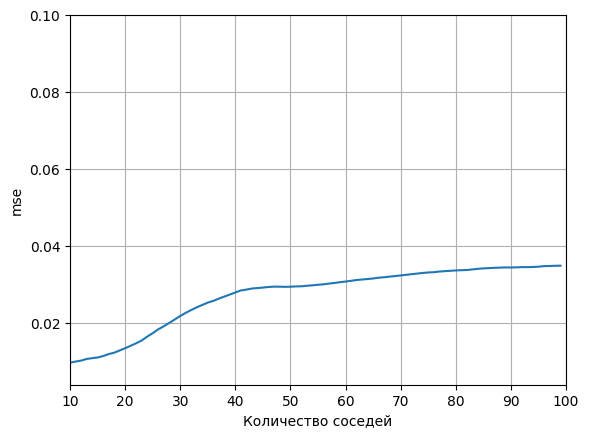

In [505]:
mse_arr.index(min(mse_arr))
mse_arr

plt.plot(range(1, len(mse_arr) + 1), mse_arr)
plt.grid()
plt.xlabel('Количество соседей')
plt.ylabel('mse')
plt.xlim(10,100)
plt.ylim(0.004,0.1)

In [500]:
# Инициализация и обучение модели
knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)


Оптимальное значение гиперпараметра = 15

In [496]:
# Предсказание
Y_pred = knn.predict(X_test)

In [498]:

# Вычисление MSE и RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 0.03609664120883633
RMSE: 0.18999116087027926


In [499]:
y_test.median()

8.1

9. Сделать общие выводы.
Из полученных результатов видно, что среднеквадратическая ошибка (MSE) составляет 0.036, а корень из среднеквадратической ошибки (RMSE) равен 0.18. Это означает, что модель имеет хорошую точность в предсказании рейтинга фильмов. Модель не всегда точно предсказывает рейтинги фильмов.